# BUSINESS UNDERSTANDING
Describe problem

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
plt.style.use('ggplot')

# DATA UNDERSTANDING - Playlists

In [4]:
playlists = pd.read_json('data/raw/playlists_artists_redundant.json', lines=True)
concerts = pd.read_json('data/raw/artists_shows.json', lines=True)

In [22]:
playlists.head()

,artist,playlist
0,DJ Snake,"[Today's Top Hits, 37i9dQZF1DXcBWIGoYBM5M]"
1,TINI,"[Today's Top Hits, 37i9dQZF1DXcBWIGoYBM5M]"
2,Bon Iver,"[Today's Top Hits, 37i9dQZF1DXcBWIGoYBM5M]"
3,Jon Z,"[Today's Top Hits, 37i9dQZF1DXcBWIGoYBM5M]"
4,Martin Garrix,"[Today's Top Hits, 37i9dQZF1DXcBWIGoYBM5M]"


Artists and the playlists they appear in.
Playlist value is currently nested. In order to one hot encode this should be trimmed to just the second element, the unique playlist id.

### Artist Occurances

In [5]:
playlists.artist.value_counts()[:25]

J Balvin          248
Bad Bunny         214
Drake             202
Cardi B           186
Daddy Yankee      182
Farruko           180
Nicky Jam         178
Ozuna             176
Maluma            174
Khalid            172
Ed Sheeran        170
Nicki Minaj       165
Camila Cabello    150
Marshmello        146
Justin Bieber     146
Diplo             144
Beyoncé           143
Ty Dolla $ign     138
Anuel Aa          136
Shawn Mendes      132
Zion & Lennox     132
Wisin             128
Rihanna           128
Natti Natasha     124
Taylor Swift      122
Name: artist, dtype: int64

#### Visualize Playlist Appearances

Text(0.5, 1.0, 'Artist Appearance in Playlists')

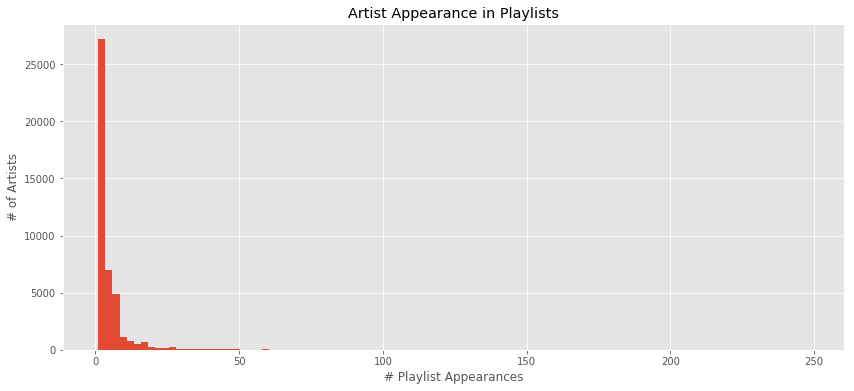

In [12]:
plt.figure(figsize=(14,6))
playlists.artist.value_counts().hist(bins=100)
plt.xlabel('# Playlist Appearances')
plt.ylabel('# of Artists')
plt.title('Artist Appearance in Playlists')

We won't be able to gain much information from artists only appearing in a few playlists.
Dropping them will reduce computational cost with little cost to predicting similar artists.

# DATA UNDERSTANDING - Concerts

In [25]:
concerts.head()

,artist,date,loc
0,2 Chainz,2019-06-30 05:30:00,"Las Vegas, NV, US"
1,2 Chainz,2019-07-12 11:00:00,"London, UK"
2,2 Chainz,2019-08-10 00:00:00,"Anaheim, CA, US"
3,2 Chainz,2019-08-24 22:00:00,"Atlanta, GA, US"
4,2 Chainz,2019-05-27 05:30:00,"Las Vegas, NV, US"


In [29]:
concerts.describe()

,artist,date,loc
count,134943,134943,134943
unique,1420,37136,4820
top,San Francisco Symphony,2019-07-19 00:00:00,"London, UK"
freq,194,191,4186
first,NaN,1973-09-29 00:00:00,NaN
last,NaN,2020-12-16 18:30:00,NaN


Artists and the time and place of their concerts. The earliest time dates back to 1973 and location includes non-US concerts. For this experiment we will just focus on concerts in the United States and from 2015 or later. ALSO that loc column should be renamed to prevent ambiguation with Pandas' .loc() method.

# DATA PREPARATION - Playlists

#### Trim rarer artists

In [24]:
cutoff = 20
top_artists_counts = [(v, c) for v, c in playlists.artist.value_counts().items()
                      if c >= cutoff]
n_remaning_artists = len(top_artists_counts)
print(f'There are {n_remaning_artists} artists appearing in {cutoff} or more playlists')
print('The twelve most prevalent are ...')
top_artists_counts[:12]

There are 1697 artists appearing in 20 or more playlists
The twelve most prevalent are ...


[('J Balvin', 248),
 ('Bad Bunny', 214),
 ('Drake', 202),
 ('Cardi B', 186),
 ('Daddy Yankee', 182),
 ('Farruko', 180),
 ('Nicky Jam', 178),
 ('Ozuna', 176),
 ('Maluma', 174),
 ('Khalid', 172),
 ('Ed Sheeran', 170),
 ('Nicki Minaj', 165)]

In [27]:
top_artists=[x[0] for x in top_artists_counts]
trimmed_playlists = playlists[playlists.artist.isin(top_artists)].copy()
trimmed_playlists.shape

(65242, 2)

Text(0.5, 1.0, 'Artist Appearance in Playlists')

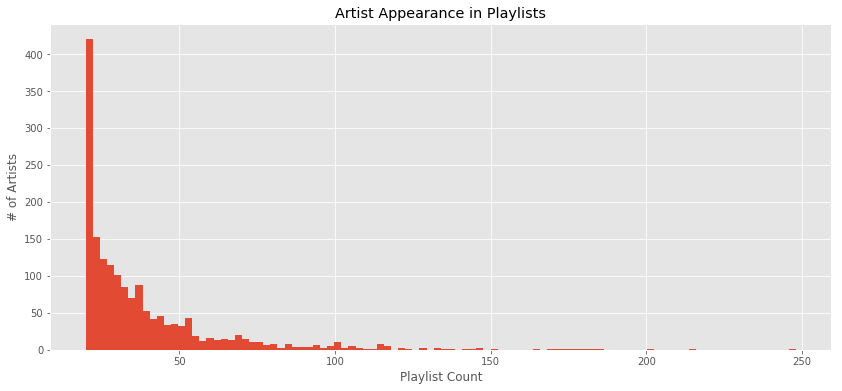

In [28]:
plt.figure(figsize=(14,6))
trimmed_playlists.artist.value_counts().hist(bins=100)
plt.xlabel('Playlist Count')
plt.ylabel('# of Artists')
plt.title('Artist Appearance in Playlists')

### One Hot Encoding Playlist Presence

In [ ]:
encoder = OneHotEncoder(drop='first', categories='auto')
encoder.fit(trimmed_df[['playlist']])

ohe_playlists= pd.DataFrame(encoder.transform(trimmed_df[['playlist']]).toarray(),
                          columns=encoder.get_feature_names(['playlist']))

# DATA PREPARATION - Concerts

In [ ]:
concerts.columns = ['artist', 'date', 'location']
concerts = concerts 

### MODELING

### EVALUATION

### DEPLOYMENT

In [ ]:
# pickle the model